In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.shape

(4600, 18)

In [5]:
df.isnull().any().sum()

0

In [6]:
df.duplicated().sum()

0

In [7]:
def plot_barplot(df, city):
    """
    Plot a bar plot of the frequency of cities.

    Parameters:
        data (DataFrame): The input DataFrame containing the data.
        city_variable (str): The name of the variable representing the cities.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(x=city, data=df)
    plt.title("Frequency of Cities")
    plt.xlabel("City")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

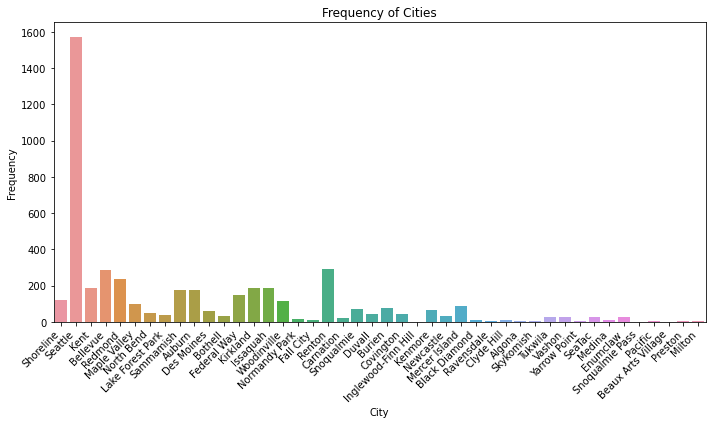

In [8]:
plot_barplot(df, 'city')

In [9]:
df.city.describe()

count        4600
unique         44
top       Seattle
freq         1573
Name: city, dtype: object

In [12]:
df.yr_built.describe()

count    4600.000000
mean     1970.786304
std        29.731848
min      1900.000000
25%      1951.000000
50%      1976.000000
75%      1997.000000
max      2014.000000
Name: yr_built, dtype: float64

In [13]:
df.price.describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [14]:
def plot_lineplot(data, year_variable, price_variable):
    """
    Plot a line plot of average price over the years built.

    Parameters:
        data (DataFrame): The input DataFrame containing the data.
        year_variable (str): The name of the variable representing the years built.
        price_variable (str): The name of the variable representing the average price.

    Returns:
        None
    """
    average_price_by_year = data.groupby(year_variable)[price_variable].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(average_price_by_year.index, average_price_by_year.values, marker='o', linestyle='-')
    plt.title("Average Price Over the Years Built")
    plt.xlabel("Year Built")
    plt.ylabel("Average Price")
    plt.show()

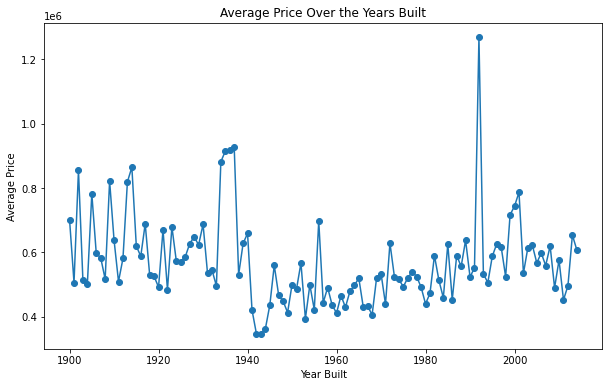

In [15]:
plot_lineplot(df, 'yr_built', 'price')

In [16]:
def plot_correlation_heatmap(data):
    """
    Plot a correlation heatmap for the DataFrame.

    Parameters:
        data (DataFrame): The input DataFrame containing the data.

    Returns:
        None
    """
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

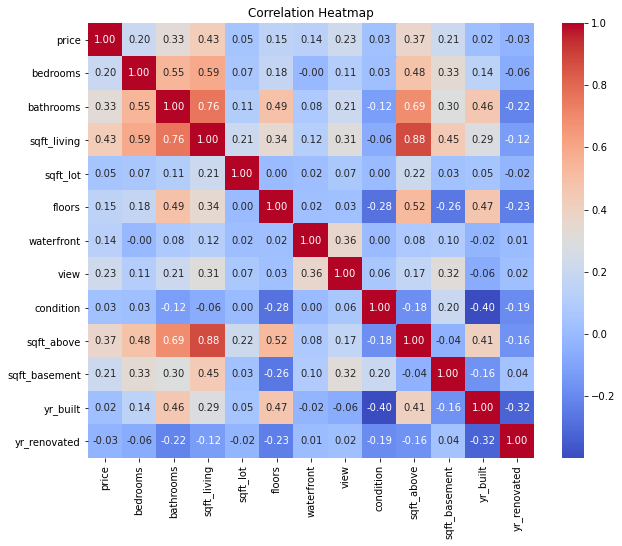

In [17]:
plot_correlation_heatmap(df)

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

In [20]:
df = df.drop(columns=['date'])

In [21]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0


In [22]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['price', 'sqft_living']])

In [25]:
max_clusters = 10
silhouette_scores = []
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))

In [26]:
def plot_scores(silhouette_scores, max_clusters):
    """
    Plot the silhouette scores to select the optimal number of clusters.

    Parameters:
    silhouette_scores (list): A list of silhouette scores for different numbers of clusters.
    max_clusters (int): The maximum number of clusters considered.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(False)
    plt.show()

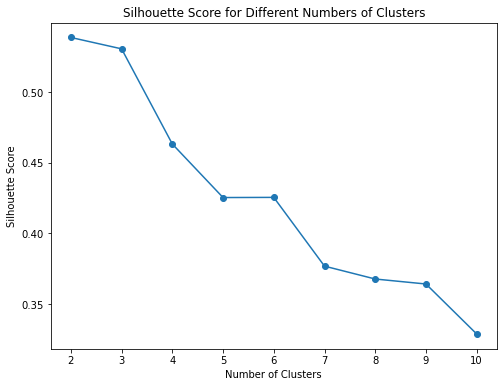

In [27]:
plot_scores(silhouette_scores, max_clusters)

Optimal number of clusters: 2


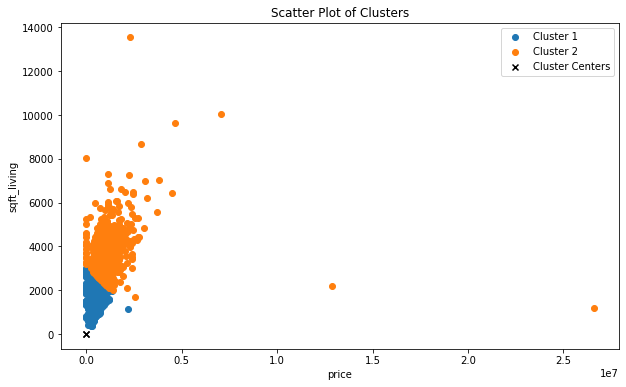

In [28]:
optimal_num_clusters = np.argmax(silhouette_scores) + 2
print("Optimal number of clusters:", optimal_num_clusters)
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
for i in range(optimal_num_clusters):
    plt.scatter(df['price'][cluster_labels == i], df['sqft_living'][cluster_labels == i], label=f'Cluster {i+1}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers')
plt.title('Scatter Plot of Clusters')
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.legend()
plt.show()

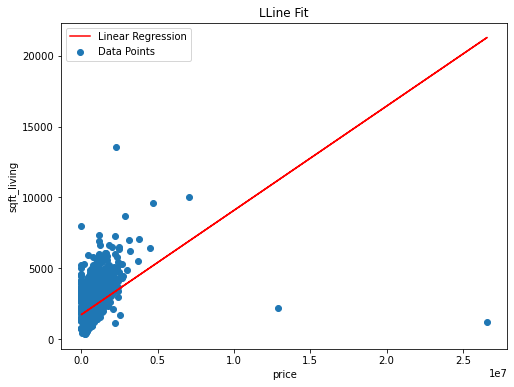

In [29]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression().fit(df[['price']], df['sqft_living'])
predictions = regression.predict(df[['price']])

plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['sqft_living'], label='Data Points')
plt.plot(df['price'], predictions, color='red', label='Linear Regression')
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.title('LLine Fit')
plt.legend()
plt.show()